# **Data Cleansing 🔥**

> Economy Class

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.calibration import LabelEncoder
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from collections import Counter

### คัดข้อมูลเฉพาะ eco class ออกมาจากข้อมูล

In [84]:
df_train = pd.read_csv("../../datasets/train.csv")
df_test = pd.read_csv("../../datasets/test.csv")

# รวมข้อมูล
df = pd.concat([df_train, df_test], ignore_index=True)
df_copy = df.copy()
business_df = df_copy[(df_copy['Class'] == 'Eco')]
business_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
6,111111116,70172,Male,Loyal Customer,13,Personal Travel,Eco,460,0,0,...,0,0,0,0,0,0,0,25,18.0,neutral or dissatisfied
7,111111117,5047,Male,disloyal Customer,25,Business travel,Eco,235,1,1,...,1,1,1,1,1,1,1,1,6.0,neutral or dissatisfied
8,111111118,110028,Female,Loyal Customer,26,Business travel,Eco,1142,2,2,...,2,2,2,2,2,2,2,0,0.0,satisfied
9,111111119,24026,Female,Loyal Customer,25,Business travel,Eco,562,3,3,...,3,3,3,3,3,3,3,11,9.0,neutral or dissatisfied
10,111111120,119299,Male,Loyal Customer,61,Business travel,Eco,214,4,4,...,4,4,4,4,4,4,4,0,0.0,satisfied


In [85]:
business_df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             192
satisfaction    

### ดูความ balance ของข้อมูล

Text(0.5, 1.0, 'Quantity of each target')

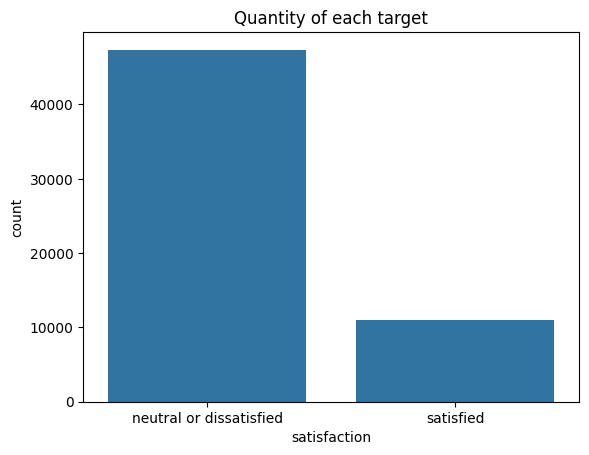

In [86]:
sns.countplot(x="satisfaction", data=business_df)
plt.title("Quantity of each target")

จะเห็นได้ว่า data มีความ imbalance ครึ่งต่อครึ่งเลย ทำให้เราต้องใช้หลัก oversampling + undersampling เพื่อแก้ปัญหานี้ นั่นคือการใช้ SMOTE นั่นเอง ซึ่งก่อนแก้ปัญหานี้ ต้องทำการ transform data ก่อน

### ตัด missing data ออก เพราะมีแค่ส่วนน้อย (หลักร้อยจากหมื่น)

In [87]:
business_df_dropNA = business_df.dropna()
business_df_dropNA

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
6,111111116,70172,Male,Loyal Customer,13,Personal Travel,Eco,460,0,0,...,0,0,0,0,0,0,0,25,18.0,neutral or dissatisfied
7,111111117,5047,Male,disloyal Customer,25,Business travel,Eco,235,1,1,...,1,1,1,1,1,1,1,1,6.0,neutral or dissatisfied
8,111111118,110028,Female,Loyal Customer,26,Business travel,Eco,1142,2,2,...,2,2,2,2,2,2,2,0,0.0,satisfied
9,111111119,24026,Female,Loyal Customer,25,Business travel,Eco,562,3,3,...,3,3,3,3,3,3,3,11,9.0,neutral or dissatisfied
10,111111120,119299,Male,Loyal Customer,61,Business travel,Eco,214,4,4,...,4,4,4,4,4,4,4,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129888,25966,30263,Male,disloyal Customer,42,Business travel,Eco,1024,4,4,...,3,3,1,2,2,3,3,0,17.0,neutral or dissatisfied
129890,25968,86816,Male,Loyal Customer,41,Business travel,Eco,692,2,2,...,2,2,3,3,2,3,2,15,3.0,neutral or dissatisfied
129892,25970,25309,Female,disloyal Customer,36,Business travel,Eco,432,1,5,...,4,5,2,5,2,3,4,0,0.0,neutral or dissatisfied
129895,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied


### ตัด feature ที่ไม่จำเป็นออก

In [88]:
business_df_dropFetures=business_df_dropNA.drop(['Unnamed: 0','id', 'Gate location', 'Gender', 'Departure/Arrival time convenient', 'Arrival Delay in Minutes'],axis=1).reset_index(drop=True)
business_df_dropFetures

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,Loyal Customer,13,Personal Travel,Eco,460,0,0,0,0,0,0,0,0,0,0,0,0,25,neutral or dissatisfied
1,disloyal Customer,25,Business travel,Eco,235,1,1,1,1,1,1,1,1,1,1,1,1,1,neutral or dissatisfied
2,Loyal Customer,26,Business travel,Eco,1142,2,2,2,2,2,2,2,2,2,2,2,2,0,satisfied
3,Loyal Customer,25,Business travel,Eco,562,3,3,3,3,3,3,3,3,3,3,3,3,11,neutral or dissatisfied
4,Loyal Customer,61,Business travel,Eco,214,4,4,4,4,4,4,4,4,4,4,4,4,0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58118,disloyal Customer,42,Business travel,Eco,1024,4,4,3,4,3,3,3,1,2,2,3,3,0,neutral or dissatisfied
58119,Loyal Customer,41,Business travel,Eco,692,2,2,2,2,2,2,2,3,3,2,3,2,15,neutral or dissatisfied
58120,disloyal Customer,36,Business travel,Eco,432,1,1,4,1,4,4,5,2,5,2,3,4,0,neutral or dissatisfied
58121,Loyal Customer,17,Personal Travel,Eco,828,2,1,2,1,2,2,4,3,4,5,4,2,0,neutral or dissatisfied


### ตัด outliers

In [89]:
# Example: Remove outliers in 'column1' and 'column2' using IQR for both columns
Q1_col1 = business_df_dropFetures['Flight Distance'].quantile(0.25)
Q3_col1 = business_df_dropFetures['Flight Distance'].quantile(0.75)
IQR_col1 = Q3_col1 - Q1_col1

Q1_col2 = business_df_dropFetures['Departure Delay in Minutes'].quantile(0.25)
Q3_col2 = business_df_dropFetures['Departure Delay in Minutes'].quantile(0.75)
IQR_col2 = Q3_col2 - Q1_col2

lower_bound_col1 = Q1_col1 - 1.5 * IQR_col1
upper_bound_col1 = Q3_col1 + 1.5 * IQR_col1

lower_bound_col2 = Q1_col2 - 1.5 * IQR_col2
upper_bound_col2 = Q3_col2 + 1.5 * IQR_col2

df_no_outliers = business_df_dropFetures[(business_df_dropFetures['Flight Distance'] >= lower_bound_col1) & (business_df_dropFetures['Flight Distance'] <= upper_bound_col1) &
                    (business_df_dropFetures['Departure Delay in Minutes'] >= lower_bound_col2) & (business_df_dropFetures['Departure Delay in Minutes'] <= upper_bound_col2)]
df_no_outliers
df_cleaned = df_no_outliers
print(df_no_outliers.shape)

(47323, 19)


### Encode object features

In [90]:
encoded_need=[]
for i in df_cleaned.columns:
  if df_cleaned[i].dtype=='object':
    print(f"Unique values of '{i}' is {df_cleaned[i].unique()}")
    encoded_need.append(i)
print("Categorical values exist in the columns : ",encoded_need)
encoded_need = encoded_need[:-1]
print(encoded_need)

Unique values of 'Customer Type' is ['Loyal Customer' 'disloyal Customer']
Unique values of 'Type of Travel' is ['Personal Travel' 'Business travel']
Unique values of 'Class' is ['Eco']
Unique values of 'satisfaction' is ['neutral or dissatisfied' 'satisfied']
Categorical values exist in the columns :  ['Customer Type', 'Type of Travel', 'Class', 'satisfaction']
['Customer Type', 'Type of Travel', 'Class']


In [91]:
max_values = df_cleaned.max()
# min_values = df_cleaned.min()

# Find columns where max = 5
columns_with_max_5 = max_values[max_values == 5].index.tolist()

print("คอลัมน์ที่มีค่า max เท่ากับ 5:", columns_with_max_5)

# Concatenate the lists
encoded_all = columns_with_max_5 + encoded_need
print(encoded_all)
print(len(encoded_all))

คอลัมน์ที่มีค่า max เท่ากับ 5: ['Inflight wifi service', 'Ease of Online booking', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']
['Inflight wifi service', 'Ease of Online booking', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Customer Type', 'Type of Travel', 'Class']
15


In [92]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

encoded = encoder.fit_transform(df_cleaned[encoded_all])

df_encoded = pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names_out(encoded_all))
df_encoded = df_encoded.astype(int)
print(list(df_encoded))
df_encoded

['Inflight wifi service_0', 'Inflight wifi service_1', 'Inflight wifi service_2', 'Inflight wifi service_3', 'Inflight wifi service_4', 'Inflight wifi service_5', 'Ease of Online booking_0', 'Ease of Online booking_1', 'Ease of Online booking_2', 'Ease of Online booking_3', 'Ease of Online booking_4', 'Ease of Online booking_5', 'Food and drink_0', 'Food and drink_1', 'Food and drink_2', 'Food and drink_3', 'Food and drink_4', 'Food and drink_5', 'Online boarding_0', 'Online boarding_1', 'Online boarding_2', 'Online boarding_3', 'Online boarding_4', 'Online boarding_5', 'Seat comfort_0', 'Seat comfort_1', 'Seat comfort_2', 'Seat comfort_3', 'Seat comfort_4', 'Seat comfort_5', 'Inflight entertainment_0', 'Inflight entertainment_1', 'Inflight entertainment_2', 'Inflight entertainment_3', 'Inflight entertainment_4', 'Inflight entertainment_5', 'On-board service_0', 'On-board service_1', 'On-board service_2', 'On-board service_3', 'On-board service_4', 'On-board service_5', 'Leg room servi

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Eco
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1
1,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,1,0,1
2,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,1,0,1
3,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,1,0,1,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47318,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,1
47319,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,1,0,1
47320,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,1,0,1
47321,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,1


In [93]:
df_drop_dummy = df_cleaned.drop(encoded_all, axis=1)
df_drop_dummy

,Age,Flight Distance,Departure Delay in Minutes,satisfaction
0,13,460,25,neutral or dissatisfied
1,25,235,1,neutral or dissatisfied
2,26,1142,0,satisfied
3,25,562,11,neutral or dissatisfied
4,61,214,0,satisfied
...,...,...,...,...
58118,42,1024,0,neutral or dissatisfied
58119,41,692,15,neutral or dissatisfied
58120,36,432,0,neutral or dissatisfied
58121,17,828,0,neutral or dissatisfied


In [94]:
# ตรวจสอบขนาดของ df_drop_dummy และ df_encoded ก่อน
print("ขนาดของ df_drop_dummy:", df_drop_dummy.shape)
print("ขนาดของ df_encoded:", df_encoded.shape)

df_drop_dummy_reset = df_drop_dummy.reset_index(drop=True)
df_encoded_reset = df_encoded.reset_index(drop=True)

df_final = pd.concat([df_encoded_reset, df_drop_dummy_reset], axis=1)

# df_final = pd.concat([df_encoded, df_drop_dummy], axis=1)
print("ขนาดของ df_final:", df_final.shape)

ขนาดของ df_drop_dummy: (47323, 4)
ขนาดของ df_encoded: (47323, 77)
ขนาดของ df_final: (47323, 81)


In [95]:
df_final

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Eco,Age,Flight Distance,Departure Delay in Minutes,satisfaction
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,1,13,460,25,neutral or dissatisfied
1,0,1,0,0,0,0,0,1,0,0,...,0,0,1,1,0,1,25,235,1,neutral or dissatisfied
2,0,0,1,0,0,0,0,0,1,0,...,0,1,0,1,0,1,26,1142,0,satisfied
3,0,0,0,1,0,0,0,0,0,1,...,0,1,0,1,0,1,25,562,11,neutral or dissatisfied
4,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,1,61,214,0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47318,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,1,42,1024,0,neutral or dissatisfied
47319,0,0,1,0,0,0,0,0,1,0,...,0,1,0,1,0,1,41,692,15,neutral or dissatisfied
47320,0,1,0,0,0,0,0,1,0,0,...,0,0,1,1,0,1,36,432,0,neutral or dissatisfied
47321,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,1,17,828,0,neutral or dissatisfied


Text(0.5, 1.0, 'Quantity of each target')

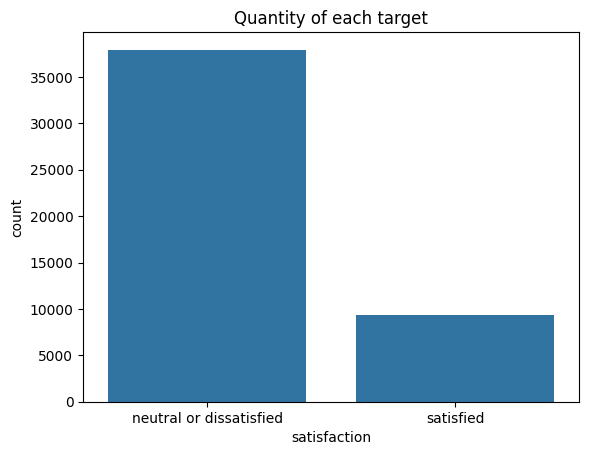

In [96]:
sns.countplot(x="satisfaction", data=df_final)
plt.title("Quantity of each target")

### แบ่งข้อมูลเป็น X กับ Y

In [97]:
X = df_final.iloc[:,:-1]
Y = df_final["satisfaction"]

In [98]:
print('Before', Counter(Y))

# Oversampling the train dataset using SMOTE
smt = SMOTE()
X_train_smote, y_train_smote = smt.fit_resample(X, Y)

# Convert the resampled arrays back to DataFrames
X_train_smote_df = pd.DataFrame(X_train_smote, columns=X.columns)  # Use the original columns
y_train_smote_df = pd.Series(y_train_smote, name='satisfaction')  # Create a Series for the target variable

# Combine features and target into a single DataFrame
df_final_smote = pd.concat([X_train_smote_df, y_train_smote_df], axis=1)

# Check the class distribution after SMOTE
counter = Counter(y_train_smote)
print('After', counter)

df_final_smote

Before Counter({'neutral or dissatisfied': 37936, 'satisfied': 9387})
After Counter({'neutral or dissatisfied': 37936, 'satisfied': 37936})


,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Eco,Age,Flight Distance,Departure Delay in Minutes,satisfaction
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,1,13,460,25,neutral or dissatisfied
1,0,1,0,0,0,0,0,1,0,0,...,0,0,1,1,0,1,25,235,1,neutral or dissatisfied
2,0,0,1,0,0,0,0,0,1,0,...,0,1,0,1,0,1,26,1142,0,satisfied
3,0,0,0,1,0,0,0,0,0,1,...,0,1,0,1,0,1,25,562,11,neutral or dissatisfied
4,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,1,61,214,0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75867,0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,1,36,447,0,satisfied
75868,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,55,411,0,satisfied
75869,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,51,1598,0,satisfied
75870,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,42,566,0,satisfied


Text(0.5, 1.0, 'Quantity of each target')

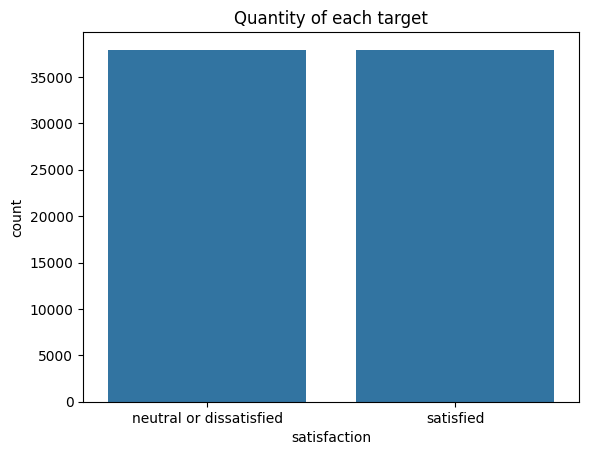

In [99]:
sns.countplot(x="satisfaction", data=df_final_smote)
plt.title("Quantity of each target")

### Save Cleaned Data

In [100]:
df_final_smote.to_csv('../../datasets/data_transformed_eco.csv', index=False)

### Save Encoder

In [101]:
import pickle
with open('../../pipelines/encoder_eco.pkl', 'wb') as f:
    pickle.dump(encoder, f)